In [109]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

### Question 1

Reliability Change: 29.600000000000033


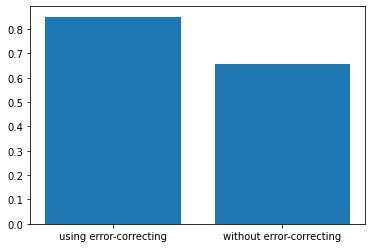

In [186]:
#binomial pdf function
def binomial(n,k,p):
    return np.math.comb(n,k)*(p**k)*((1-p)**(n-k))
UEC=binomial(7,0,0.1)+binomial(7,1,0.1)
WEC=binomial(4,0,0.1)
print('Reliability Change:',((UEC-WEC)/WEC)*100)
datax=[UEC,WEC]
datay=['using error-correcting','without error-correcting']
plt.bar(datay,datax)
plt.show()

### Question 2

In [264]:
def convolution(x,h):
        len_x=np.size(x)
        len_h=np.size(h)
        C = np.zeros(len_x + len_h -1)
        for m in np.arange(len_x):
            for n in np.arange(len_h):
                C[m+n] = C[m+n] + x[m]*h[n]
        return C 

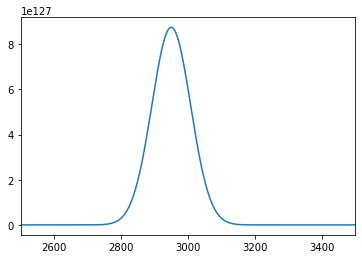

In [265]:
x=np.arange(-1,3,0.05)
#uniform pdf 
def pdf(a,b,t):
    y=np.zeros(len(t))
    y[(t>=a) & (t<=b)] = 1/(b-a)
    y[(t<a) & (t>b)] = 0
    return y
#plt.plot(x,pdf(0,1,x))
pdfx=pdf(0,1,x)
#res1=np.convolve(pdfx,pdfx)
res1=convolution(pdfx,pdfx)
for i in range(1,99):
    #res1=np.convolve(res1,pdfx)
    res1=convolution(res1,pdfx)
plt.xlim(2500,3500)
plt.plot(res1)
plt.show()

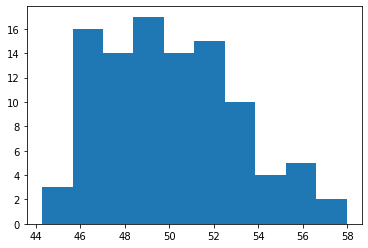

In [199]:
#Ques2
def u(n):
    x=[]
    for i in range(n):
        x.append(np.random.uniform(0,1)) #generating 100 unifrom RVs between (0,1)
    return x
def sum_u(n):
    res=[]
    for i in range(n):
        res.append(sum(u(100))) #getting sum of 100 uniform RVs and storing in sum_1 (for n times)
    return res
plt.hist(sum_u(100))
plt.show()

<AxesSubplot:ylabel='Density'>

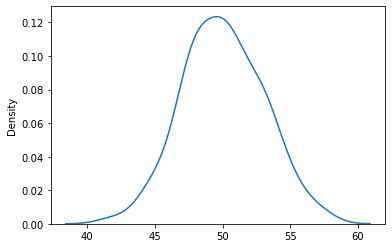

In [232]:
sns.kdeplot(sum_u(100))

### Question3

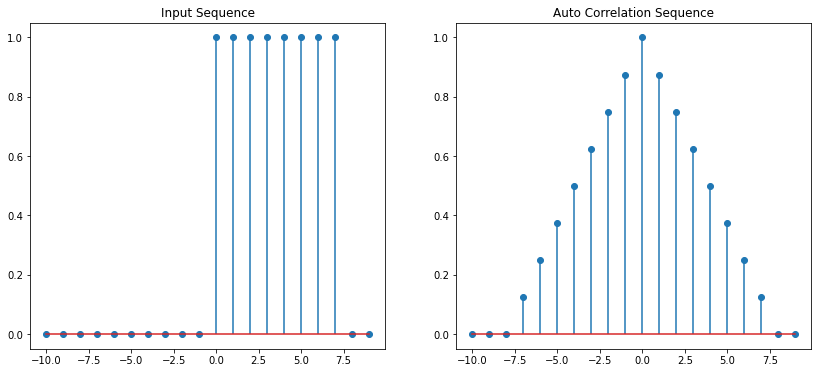

In [252]:
#input sequnce
def x(n):
    if (n>=0) and (n<=7):
        return 1
    else:
        return 0
    
#auro-correlation function
def corr(x,k,N):
    cres=[]
    for i in range(9):
        cres.append(x(i)*x(i-k))
    return np.sum(cres)/N

n=np.arange(-10,10,1)
xn=[]
for i in n:
    xn.append(x(i))
    
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.stem(n,xn) 
plt.title('Input Sequence')
cn=[]
for i in n:
    cn.append(corr(x,i,8))
plt.subplot(122)
plt.stem(n,cn)
plt.title('Auto Correlation Sequence')
plt.show()

### Question4

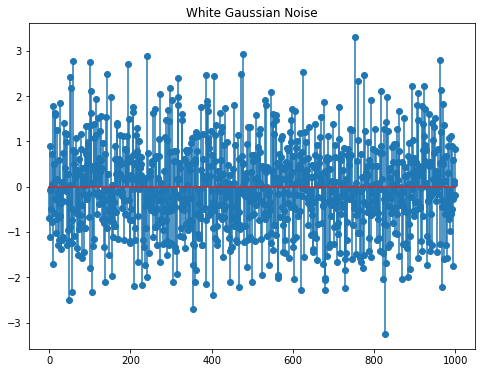

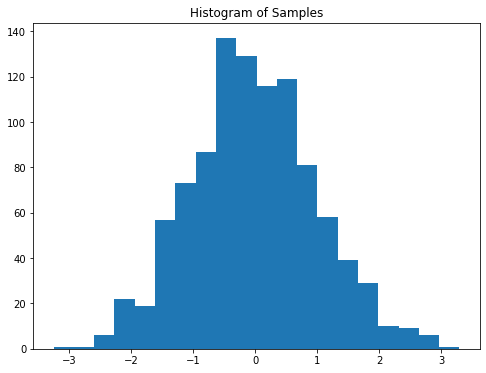

In [202]:
#4a
def gauss(N):
    return np.random.normal(0,1,N)  #gives N samples of zero mean and unit variance of white gaussian

g1=gauss(1000)
plt.figure(figsize=(8,6))
plt.stem(g1)
plt.title('White Gaussian Noise')

plt.figure(figsize=(8,6))
plt.hist(g1,bins=20)
plt.title('Histogram of Samples')
plt.show()

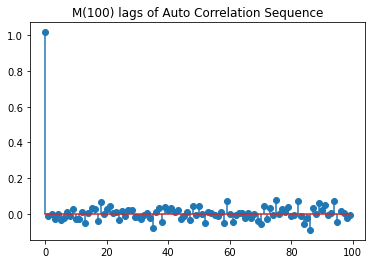

In [235]:
#4b
def correlation(x,k,N):
    cres=[]
    for i in range(N):
        cres.append(x[i]*x[i-k])
    return np.sum(cres)/N

n1=np.arange(0,100,1)
cn=[]
for i in n1:
    cn.append(correlation(g1,i,1000))
plt.stem(n1,cn)
plt.title('M(100) lags of Auto Correlation Sequence')
plt.show()

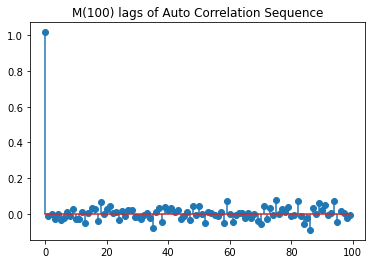

In [236]:
#4c
def correlation2(x,k,M,N):
    cres=[]
    for i in range(10):
        for j in range(M):
            cres.append(x[j+100*i]*x[j-k+100*i])
    return np.sum(cres)/N
#n1=np.arange(0,100,1)
cn2=[]
for i in n1:
    cn2.append(correlation2(g1,i,100,1000))
plt.stem(n1,cn2)
plt.title('M(100) lags of Auto Correlation Sequence')
plt.show()

<StemContainer object of 3 artists>

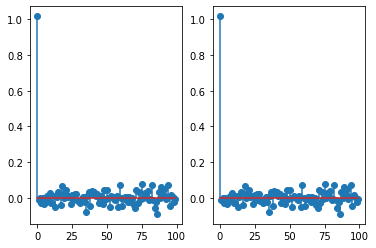

In [237]:
plt.subplot(121)
plt.stem(cn)

plt.subplot(122)
plt.stem(cn2)

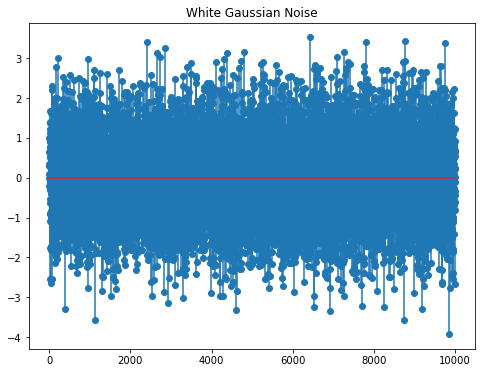

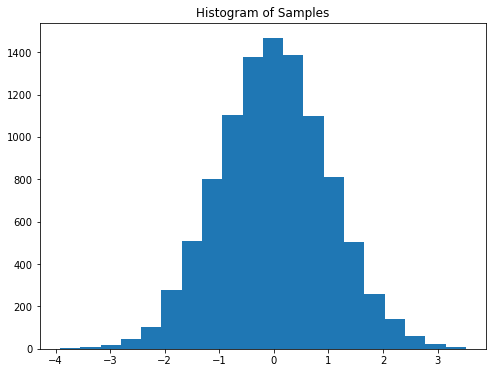

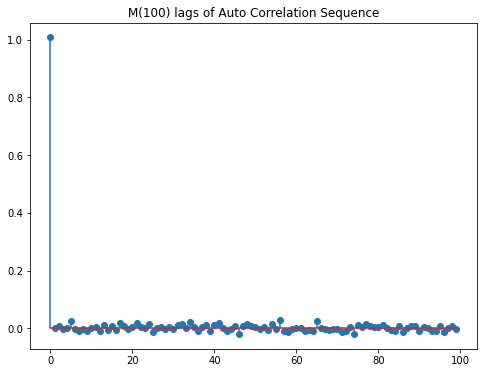

In [206]:
#4d
g2=gauss(10000)
plt.figure(figsize=(8,6))
plt.stem(g2)
plt.title('White Gaussian Noise')

plt.figure(figsize=(8,6))
plt.hist(g2,bins=20)
plt.title('Histogram of Samples')

plt.figure(figsize=(8,6))
cn3=[]
for i in n1:
    cn3.append(correlation(g2,i,10000))
plt.stem(n1,cn3)
plt.title('M(100) lags of Auto Correlation Sequence')
plt.show()

<StemContainer object of 3 artists>

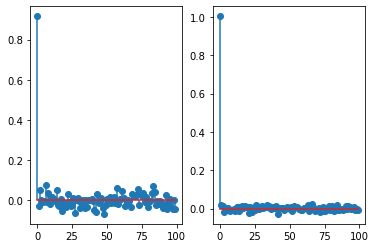

In [124]:
plt.subplot(121)
plt.stem(cn2)

plt.subplot(122)
plt.stem(cn3)

### Question5

In [207]:
df=pd.read_csv('seeds_dataset.txt',sep = '\s+',header=None) #reading data
#adding columns
df.columns=['Area','Perimeter','Compactness','Kernel Length','Kernel Width','Asymmetry coeff','Groove length','Type']
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coeff,Groove length,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [126]:
#correlation function
def corrcoeff(x,y):
    xm=np.mean(x)
    ym=np.mean(y)
    num0=[]
    den1=[]
    den2=[]
    for i in range(len(x)):
        num0.append((x[i]-xm)*(y[i]-ym))
        den1.append((x[i]-xm)**2)
        den2.append((y[i]-ym)**2)
    num=np.sum(num0)
    den=np.sqrt(np.sum(den1))*np.sqrt(np.sum(den2))
    return num/den

In [211]:
ln=len(df.columns)
CM=np.zeros([ln,ln])
for i in range(ln):
    for j in range(ln):
        CM[i][j]=corrcoeff(df[df.columns[i]],df[df.columns[j]])

print('Correlation without inbuilt function')
dfm=pd.DataFrame(CM,columns=df.columns,index=df.columns)
display(dfm)

Correlation without inbuilt function


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coeff,Groove length,Type
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Kernel Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Kernel Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry coeff,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Groove length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [215]:
print('Correlation using inbuilt function')
display(df.corr())

Correlation using inbuilt function


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coeff,Groove length,Type
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Kernel Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Kernel Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry coeff,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Groove length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [129]:
#covariance function
def cov(x,y):
    xm=np.mean(x)
    ym=np.mean(y)
    num0=[]
    for i in range(len(x)):
        num0.append((x[i]-xm)*(y[i]-ym))
    num=np.sum(num0)
    return num/(len(x)-1)

In [213]:
CM2=np.zeros([ln,ln])
for i in range(ln):
    for j in range(ln):
        CM2[i][j]=cov(df[df.columns[i]],df[df.columns[j]])

print('Covariance without inbuilt function')
dfm2=pd.DataFrame(CM2,columns=df.columns,index=df.columns)
display(dfm2)

Covariance without inbuilt function


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coeff,Groove length,Type
Area,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133,-0.824115
Perimeter,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753,-0.350478
Compactness,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634,-0.010269
Kernel Length,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125,-0.093292
Kernel Width,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068,-0.130909
Asymmetry coeff,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187,0.710382
Groove length,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553,0.009775
Type,-0.824115,-0.350478,-0.010269,-0.093292,-0.130909,0.710382,0.009775,0.669856


In [216]:
print('Covariance using inbuilt function')
display(df.cov())

Covariance using inbuilt function


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coeff,Groove length,Type
Area,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133,-0.824115
Perimeter,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753,-0.350478
Compactness,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634,-0.010269
Kernel Length,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125,-0.093292
Kernel Width,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068,-0.130909
Asymmetry coeff,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187,0.710382
Groove length,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553,0.009775
Type,-0.824115,-0.350478,-0.010269,-0.093292,-0.130909,0.710382,0.009775,0.669856


### Question6

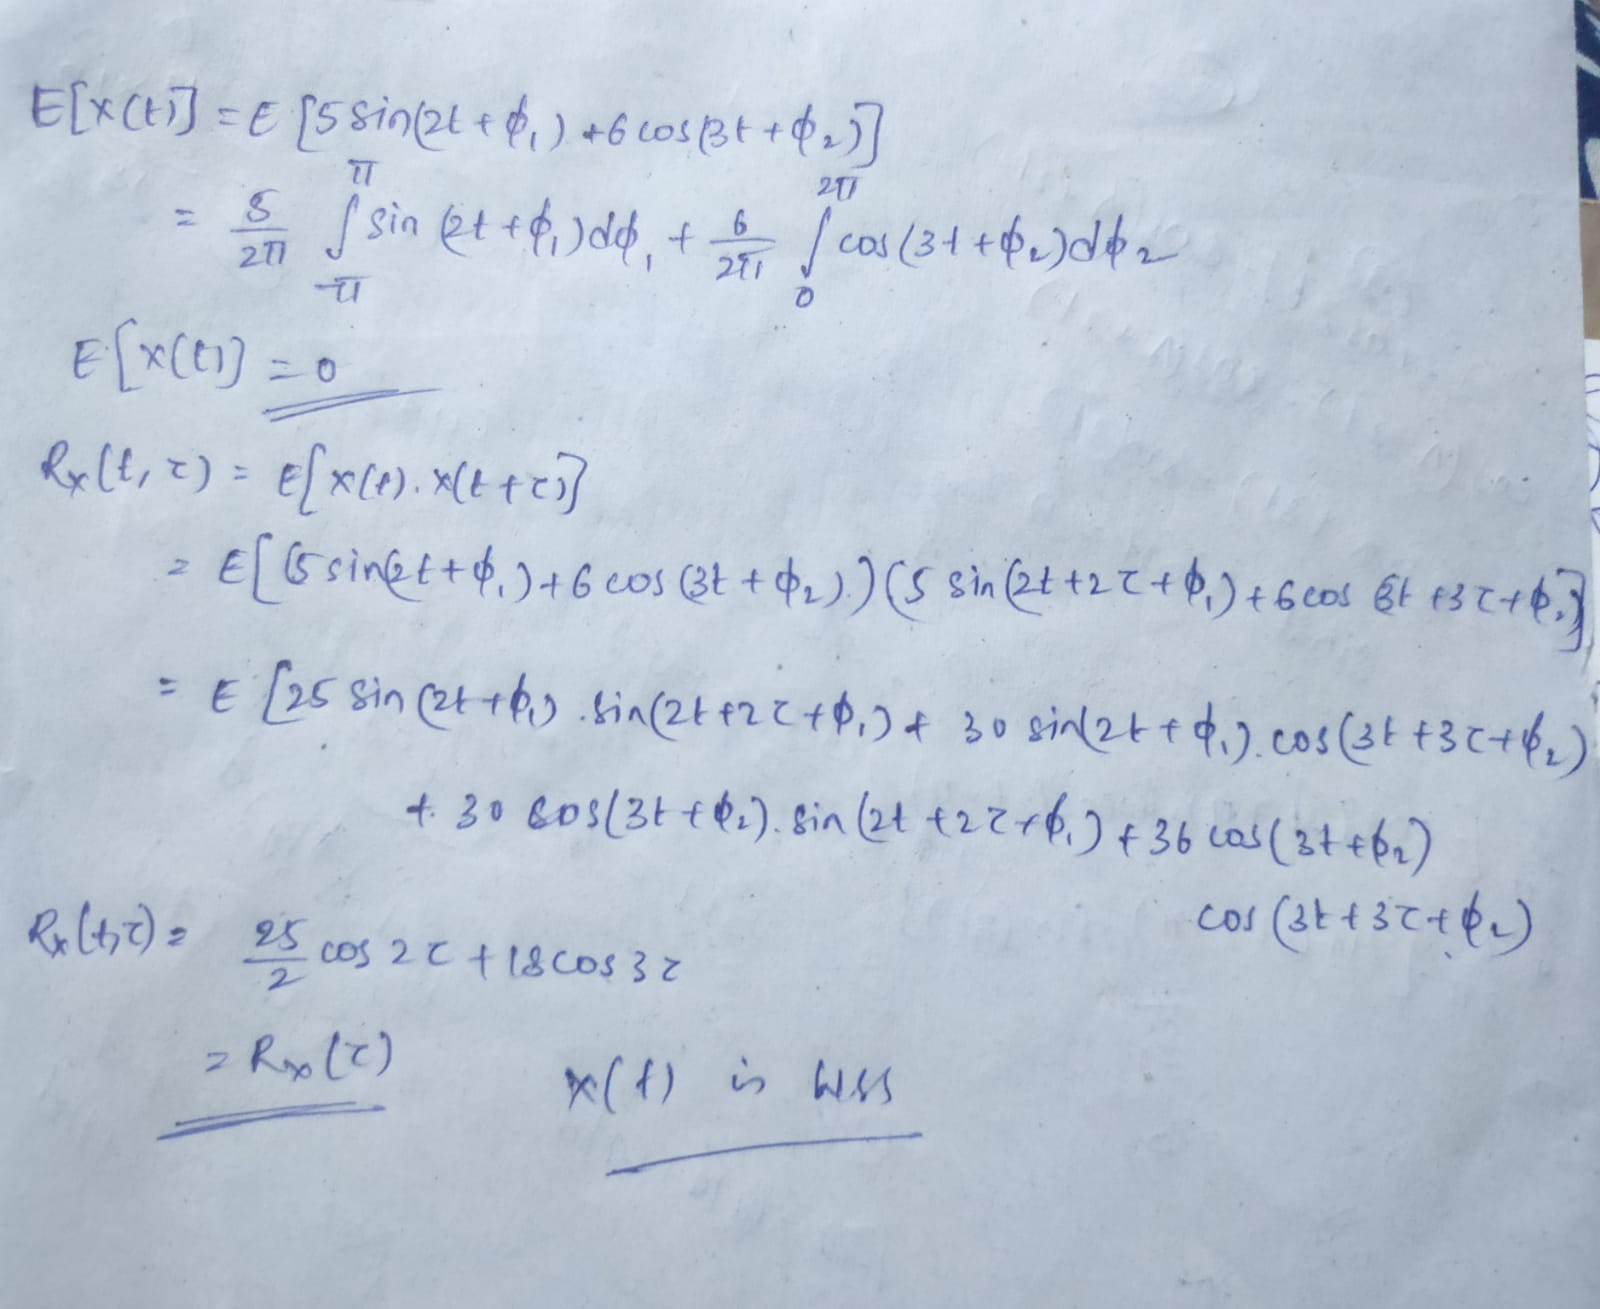

In [253]:
from IPython.display import Image

Image(filename='WSS_Image1.jpeg',width=400, height=200)

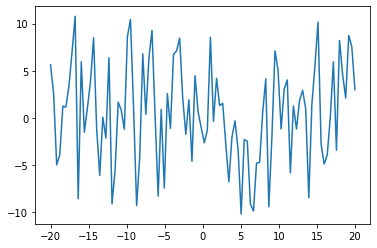

In [132]:
t1=np.linspace(-20,20,100)
phi1=np.random.uniform(-np.pi,np.pi,100)
phi2=np.random.uniform(0,2*np.pi,100)
def randpro(t):
    return (5*np.sin(2*t+phi1))+(6*np.cos(3*t+phi2))
plt.plot(t1,randpro(t1))

<StemContainer object of 3 artists>

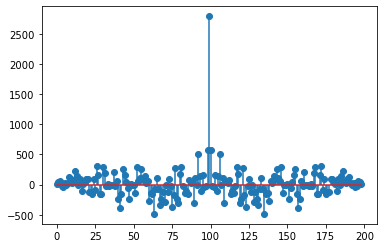

In [242]:
cres=randpro(t1)
cres1=np.correlate(cres,cres,mode='full')
plt.stem(cres1)

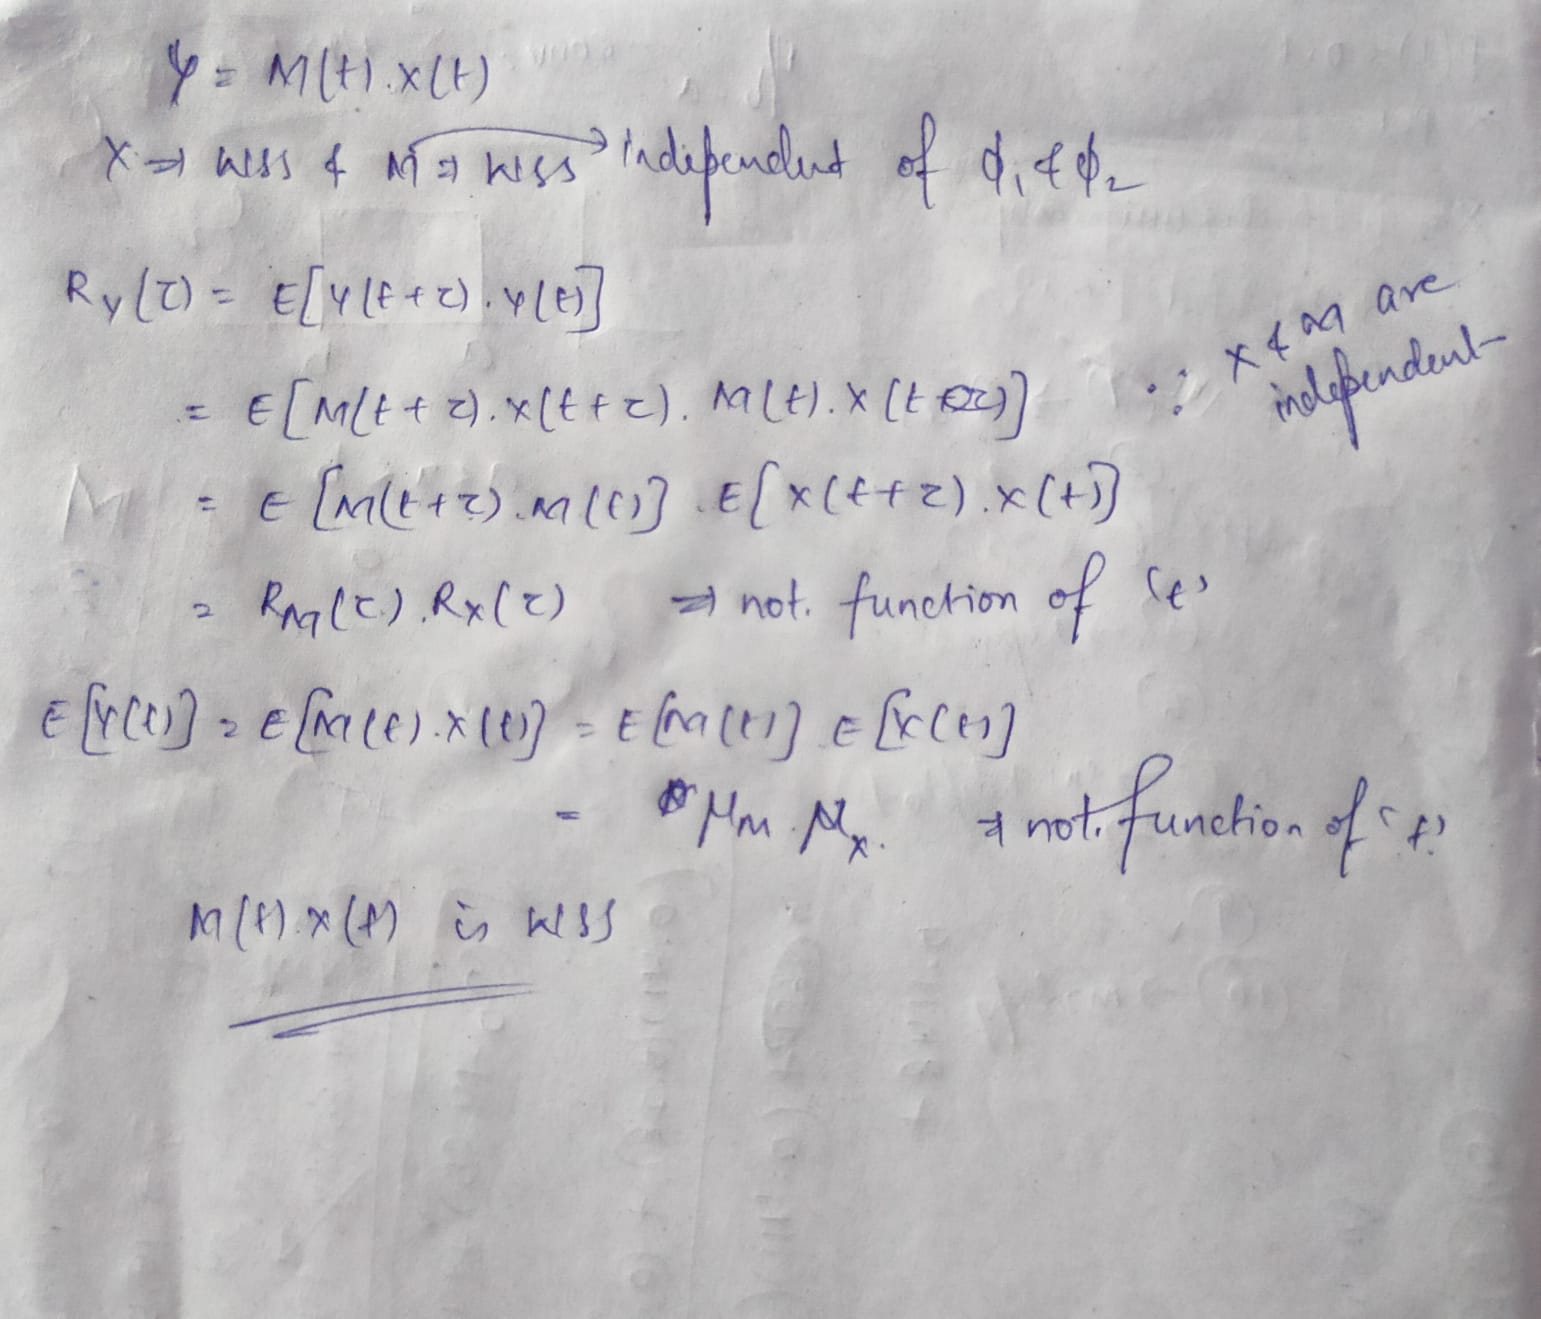

In [254]:
#Question6b
from IPython.display import Image

Image(filename='WSS_Image.jpeg',width=400, height=200)

### Question7

In [218]:
print('Samples for chi-squared: ')
print(np.random.chisquare(2,size=(2,3)))

Samples for chi-squared: 
[[0.16982494 1.31949277 1.58731298]
 [0.01160504 0.10705919 0.22429525]]


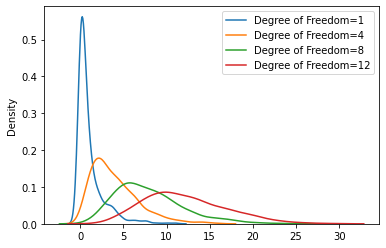

In [220]:
chi1=np.random.chisquare(1,size=1000)
chi2=np.random.chisquare(4,size=1000)
chi3=np.random.chisquare(8,size=1000)
chi4=np.random.chisquare(12,size=1000)


sns.kdeplot(chi1,label='Degree of Freedom=1')
sns.kdeplot(chi2,label='Degree of Freedom=4')
sns.kdeplot(chi3,label='Degree of Freedom=8')
sns.kdeplot(chi4,label='Degree of Freedom=12')
plt.legend()
plt.show()

### Question8

In [221]:
print('Samples for exponential: ')
print(np.random.exponential(2,size=(2,3)))

Samples for exponential: 
[[1.71154253 0.17678153 1.51760879]
 [0.82175611 3.58412615 1.49295138]]


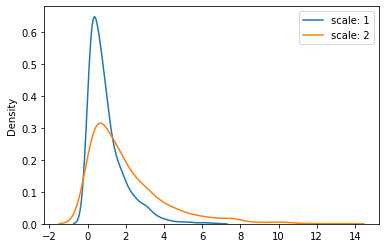

In [222]:
exp1=np.random.exponential(size=1000)
exp2=np.random.exponential(scale=2,size=1000)
sns.kdeplot(exp1,label='scale: 1')
sns.kdeplot(exp2,label='scale: 2')
plt.legend()
plt.show()

### Question 9

In [223]:
num_list=[2,4,6,8]
num_list_p=np.random.choice(num_list,100,p=[0.1,0.3,0.6,0])
num_list_p

array([6, 6, 6, 6, 4, 6, 2, 6, 4, 6, 6, 2, 2, 6, 6, 2, 6, 2, 6, 6, 4, 4,
       6, 4, 4, 6, 4, 4, 4, 4, 6, 2, 6, 6, 6, 6, 6, 6, 4, 4, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 2, 6, 2, 6, 4, 6, 4,
       6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6,
       2, 6, 6, 6, 6, 4, 4, 4, 6, 6, 2, 6])

In [224]:
num_list_p2d=np.random.choice(num_list,size=(3,5),p=[0.1,0.3,0.6,0])
num_list_p2d

array([[4, 6, 6, 6, 4],
       [6, 4, 6, 4, 6],
       [4, 6, 6, 4, 6]])

### Question 10

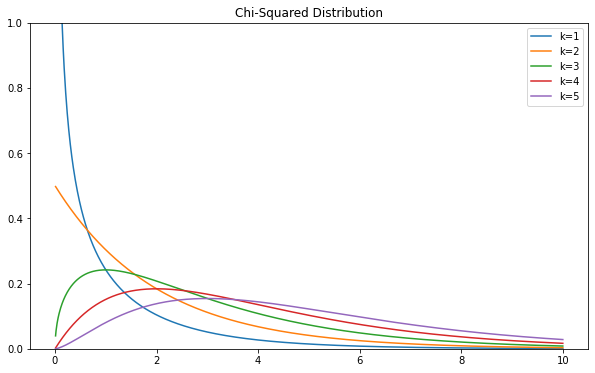

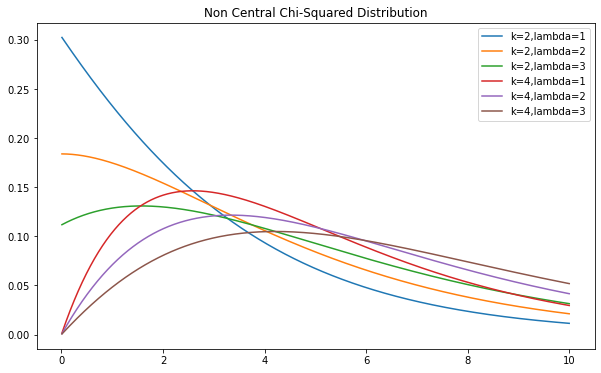

In [260]:
#pdf function for central chi-squared
def centralchi(n):
    res = []
    #x = np.linspace(0.01,10,1000)
    for i in x:
        num = (i**(n/2-1)) * np.exp(-i/2)
        den = (2**(n/2)) * np.math.gamma(n/2)
        res.append(num/den)
    return res

#pdf function for non-central chi-squared
def noncentralchi(n,l):
    res = 0
    
    for k in range(0,100):
        var1 = np.array(centralchi(n+2*k))
        var2 = np.exp(-l/2) * np.power(l/2,k) / np.math.factorial(k)
        res = res + var1*var2
    
    return res

#plotting central chi-squared
x=np.linspace(0.01,10,1000)
plt.figure(figsize=(10,6))
plt.plot(x, centralchi(1), label='k=1')
plt.plot(x, centralchi(2), label='k=2')
plt.plot(x, centralchi(3), label='k=3')
plt.plot(x, centralchi(4), label='k=4')
plt.plot(x, centralchi(5), label='k=5')
plt.title('Chi-Squared Distribution')
plt.ylim(0,1)
plt.legend()
plt.show()

#plotting non-central chi-squared
plt.figure(figsize=(10,6))
plt.plot(x,  noncentralchi(2,1),  label='k=2,lambda=1')
plt.plot(x,  noncentralchi(2,2),  label='k=2,lambda=2')
plt.plot(x,  noncentralchi(2,3),  label='k=2,lambda=3')
plt.plot(x,  noncentralchi(4,1),  label='k=4,lambda=1')
plt.plot(x,  noncentralchi(4,2),  label='k=4,lambda=2')
plt.plot(x,  noncentralchi(4,3),  label='k=4,lambda=3')
plt.title('Non Central Chi-Squared Distribution')
plt.legend()
plt.show()